In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd
from matplotlib import cm


import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker
import warnings 
# this will allow us to use the code in peace :) 
warnings.filterwarnings("ignore")

### Lecture 19:

- Learn about gridding and contouring with cartopy





### Gridding

Remember this figure?   



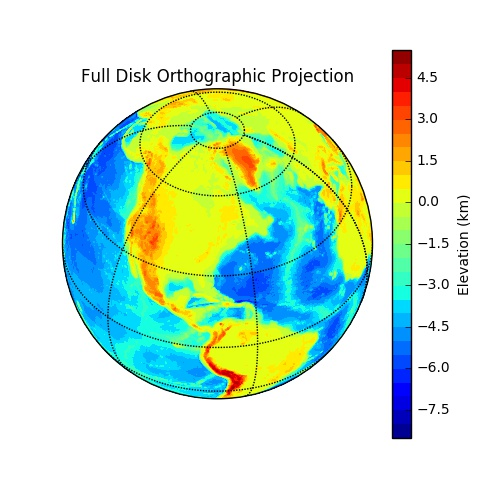

In [2]:
Image(filename='Figures/etopo20.jpg',width=500)

We now have the tools to make it!

First, you should recognize the basic orthographic projection from last lecture.

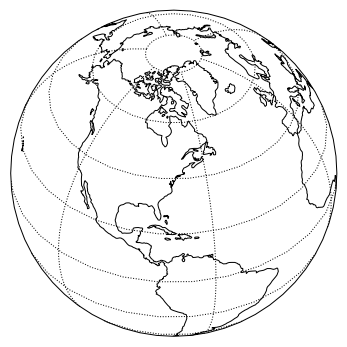

In [3]:
plt.figure(1,(6,6))
ax = plt.axes(projection=ccrs.Orthographic(-75, 42))
San_lat=33
San_lon=-117%360  # takes the west longitude and converts to 0=>360
gl=ax.gridlines(crs=ccrs.PlateCarree(),color='black',linewidth=1,linestyle='dotted')
#gl.xlabels_top = False
gl.ylocator=mticker.FixedLocator(np.arange(-80,81,20))
gl.xlocator=mticker.FixedLocator(np.arange(-180,181,60));
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.set_global()
ax.coastlines();




We already encountered the topographic data  in the lecture on the hypsographic curve.  Let's import them  here and look at their shapes again: 

In [4]:
etopo=np.loadtxt('Datasets/Etopo/etopo20data.gz')
elons=np.loadtxt('Datasets/Etopo/etopo20lons.gz')
elats=np.loadtxt('Datasets/Etopo/etopo20lats.gz')
print (etopo.shape)
print (elons.shape)
print (elats.shape)




(540, 1081)
(1081,)
(540,)


**elats** is a 1D array with 540 latitudinal bins (this is a long and skinny array- 540 x 1). 

**elons** is a 1D array with 1081 longitudinal bins (this as a fat and wide array- 1 x 1081).  
And **etopo** is a 2D array with 540 rows and 1081 columns (540 x 1080).  

So **etopo** has an elevation for each lat/lon cell.  

In order to plot the elevation data onto a lat/lon grid, we have to first make a grid out of the 1D arrays of elats/ and elons.  

We use the **numpy** function **meshgrid** for this.  



In [5]:
help (np.meshgrid)

Help on function meshgrid in module numpy.lib.function_base:

meshgrid(*xi, **kwargs)
    Return coordinate matrices from coordinate vectors.
    
    Make N-D coordinate arrays for vectorized evaluations of
    N-D scalar/vector fields over N-D grids, given
    one-dimensional coordinate arrays x1, x2,..., xn.
    
    .. versionchanged:: 1.9
       1-D and 0-D cases are allowed.
    
    Parameters
    ----------
    x1, x2,..., xn : array_like
        1-D arrays representing the coordinates of a grid.
    indexing : {'xy', 'ij'}, optional
        Cartesian ('xy', default) or matrix ('ij') indexing of output.
        See Notes for more details.
    
        .. versionadded:: 1.7.0
    sparse : bool, optional
        If True a sparse grid is returned in order to conserve memory.
        Default is False.
    
        .. versionadded:: 1.7.0
    copy : bool, optional
        If False, a view into the original arrays are returned in order to
        conserve memory.  Default is True.  P

Let's try out meshgrid on some smaller arrays first, to wrap our mind around it, so to speak. 

In [6]:
x = np.arange(-3.2, 3.3, 0.1) # make a 1D array from -3.3 to 3.2 with a spacing of .1
y = np.arange(-3.2, 3.3, 0.1) # ditto
xx, yy = np.meshgrid(x, y) # make a meshgrid
print (x.shape)
print (y.shape)
print (xx.shape)
print (xx[0:5])

(65,)
(65,)
(65, 65)
[[-3.20000000e+00 -3.10000000e+00 -3.00000000e+00 -2.90000000e+00
  -2.80000000e+00 -2.70000000e+00 -2.60000000e+00 -2.50000000e+00
  -2.40000000e+00 -2.30000000e+00 -2.20000000e+00 -2.10000000e+00
  -2.00000000e+00 -1.90000000e+00 -1.80000000e+00 -1.70000000e+00
  -1.60000000e+00 -1.50000000e+00 -1.40000000e+00 -1.30000000e+00
  -1.20000000e+00 -1.10000000e+00 -1.00000000e+00 -9.00000000e-01
  -8.00000000e-01 -7.00000000e-01 -6.00000000e-01 -5.00000000e-01
  -4.00000000e-01 -3.00000000e-01 -2.00000000e-01 -1.00000000e-01
   2.66453526e-15  1.00000000e-01  2.00000000e-01  3.00000000e-01
   4.00000000e-01  5.00000000e-01  6.00000000e-01  7.00000000e-01
   8.00000000e-01  9.00000000e-01  1.00000000e+00  1.10000000e+00
   1.20000000e+00  1.30000000e+00  1.40000000e+00  1.50000000e+00
   1.60000000e+00  1.70000000e+00  1.80000000e+00  1.90000000e+00
   2.00000000e+00  2.10000000e+00  2.20000000e+00  2.30000000e+00
   2.40000000e+00  2.50000000e+00  2.60000000e+00  2.70

Now let's put some 'data' on this grid:

In [7]:
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
print (z.shape)
print (z[0:5])

(65, 65)
[[ 0.04874129  0.04240357  0.01978166 -0.01062917 -0.03848542 -0.05525412
  -0.05655279 -0.04273656 -0.01799396  0.01139893  0.03895874  0.05947836
   0.06985375  0.0692455   0.05873339  0.04068985  0.01808671 -0.0061086
  -0.02936306 -0.04981395 -0.0663341  -0.07847277 -0.08632353 -0.09036374
  -0.0912986  -0.08992935 -0.08705429 -0.08340291 -0.0795987  -0.07614349
  -0.07341601 -0.0716779  -0.07108182 -0.0716779  -0.07341601 -0.07614349
  -0.0795987  -0.08340291 -0.08705429 -0.08992935 -0.0912986  -0.09036374
  -0.08632353 -0.07847277 -0.0663341  -0.04981395 -0.02936306 -0.0061086
   0.01808671  0.04068985  0.05873339  0.0692455   0.06985375  0.05947836
   0.03895874  0.01139893 -0.01799396 -0.04273656 -0.05655279 -0.05525412
  -0.03848542 -0.01062917  0.01978166  0.04240357  0.04874129]
 [ 0.04240357  0.01883608 -0.01274966 -0.04093405 -0.05646843 -0.05497775
  -0.0375519  -0.00954929  0.0215723   0.04851553  0.06584536  0.07083765
   0.06350006  0.04599635  0.02177758 -0.0

### Colormesh

Now we want to make a plot of the data - right?  There are many options to do this.  One rather simple way would be  to plot the x,y data points and use color to represent the value of the z. For this we have **plt.pcolormesh( )**.  

In [8]:
help(plt.pcolormesh)

Help on function pcolormesh in module matplotlib.pyplot:

pcolormesh(*args, **kwargs)
    Create a pseudocolor plot with a non-regular rectangular grid.
    
    Call signature::
    
        pcolor([X, Y,] C, **kwargs)
    
    *X* and *Y* can be used to specify the corners of the quadrilaterals.
    
    .. note::
    
       ``pcolormesh()`` is similar to :func:`~Axes.pcolor`. It's much
       faster and preferred in most cases. For a detailed discussion on
       the differences see
       :ref:`Differences between pcolor() and pcolormesh()
       <differences-pcolor-pcolormesh>`.
    
    Parameters
    ----------
    C : array_like
        A scalar 2-D array. The values will be color-mapped.
    
    X, Y : array_like, optional
        The coordinates of the quadrilateral corners. The quadrilateral
        for ``C[i,j]`` has corners at::
    
            (X[i+1, j], Y[i+1, j])          (X[i+1, j+1], Y[i+1, j+1])
                                  +--------+
                       

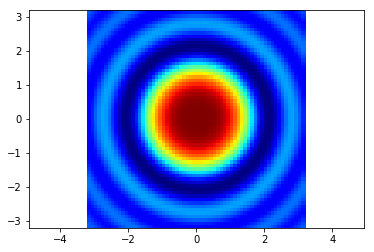

In [9]:
plt.pcolormesh(x,y,z,cmap=cm.jet)
plt.axis('equal');

We probably want a color bar too:  

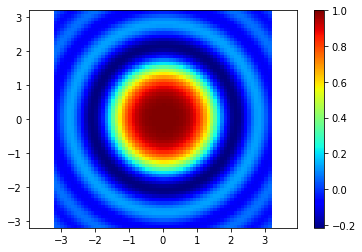

In [10]:
plt.pcolormesh(x,y,z,cmap=cm.jet)
plt.axis('equal')
plt.colorbar();

And the plot looks a little 'pixilated' (rough).  We can smooth it with the keyword **shading**.  

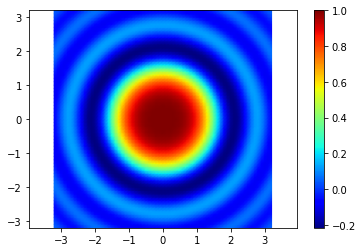

In [11]:
plt.pcolormesh(x,y,z,cmap=cm.jet,shading='gouraud')
plt.axis('equal')
plt.colorbar();

Very nice.  A related technique to plotting on a mesh is contouring.  Contouring breaks the data down into regions separated by equal values (contours). 

### Contouring

Another way to visualize data in a 2D grid would be to make a contour plot of it.  For this we
use the **matplotlib.pyplot** function **contour**  or **contourf**.  

In [12]:
help(plt.contour)

Help on function contour in module matplotlib.pyplot:

contour(*args, **kwargs)
    Plot contours.
    
    Call signature::
    
        contour([X, Y,] Z, [levels], **kwargs)
    
    :func:`~matplotlib.pyplot.contour` and
    :func:`~matplotlib.pyplot.contourf` draw contour lines and
    filled contours, respectively.  Except as noted, function
    signatures and return values are the same for both versions.
    
    
    Parameters
    ----------
    X, Y : array-like, optional
        The coordinates of the values in *Z*.
    
        *X* and *Y* must both be 2-D with the same shape as *Z* (e.g.
        created via :func:`numpy.meshgrid`), or they must both be 1-D such
        that ``len(X) == M`` is the number of columns in *Z* and
        ``len(Y) == N`` is the number of rows in *Z*.
    
        If not given, they are assumed to be integer indices, i.e.
        ``X = range(M)``, ``Y = range(N)``.
    
    Z : array-like(N, M)
        The height values over which the contour is 

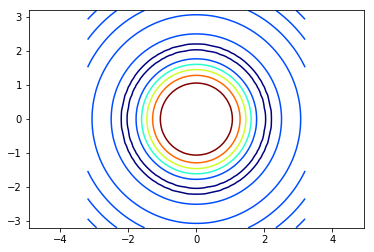

In [13]:
h = plt.contour(x,y,z,cmap=cm.jet) # plot the contours
plt.axis('equal'); 
# this makes the axes "square" so we get a circle and not a squashed ellipse



Contour plots are  all well and good, but what we were after was a continuous gradation of color, not the contour lines, so for that we use the function **contourf** instead: 

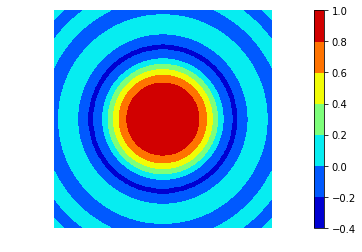

In [14]:
fig = plt.contourf(x,y,z,cmap=cm.jet)
plt.axis('equal') # this makes the axes square
plt.axis('off') # and this turns off the frame, ticks and labels
plt.colorbar();



Note the difference between the **colormesh** (continuous gradation) and  **contouf** (constant color between contours).  

So, where were we? Oh yes, we wanted to plot the contoured elevation data onto an orthographic projection.  First, we will generate a meshgrid using **np.meshgrid** from **numpy** and the method **contourf** of our  map object **ax** defined above.  The method **ax.contourf** works like **matplotlib**'s:

In [ ]:
plt.figure(1,(6,6))
ax = plt.axes(projection=ccrs.Orthographic(-75, 42))
gl=ax.gridlines(crs=ccrs.PlateCarree(),color='black',linewidth=1,linestyle='dotted')
gl.ylocator=mticker.FixedLocator(np.arange(-80,81,20))
gl.xlocator=mticker.FixedLocator(np.arange(-180,181,60));
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
X, Y = np.meshgrid(elons,elats)
levels=np.arange(-10000,8000,500) # define contour intervals
m=ax.contourf(X, Y, etopo,levels,\
                transform=ccrs.PlateCarree(),
                cmap=cm.jet)
ax.set_global()
cbar=plt.colorbar(m) # put on a color bar of Elevations




Tada!!!

### Application to the Earth's magnetic field

Now we know how to grid and contour data, we can try to plot other features of our planet, like the magnetic field strength or inclination (dip below or above the horizontal).  I prepared a module named **mkigrf** for your mapping pleasure.   It includes a few functions that evaluate the elements of the magnetic field for any date between 1900 and 2020 including total field strength, direction, and radial field strength. Up until 2015, the data come from the  International Geomagnetic Reference Field (IGRF) model and after that, the data are extrapolated.  To learn more, check out this website:  https://www.ngdc.noaa.gov/IAGA/vmod/igrf.html.

You can use the function **mkigrf.doigrf**  to find out the magnetic declination at a particular time and place. You could then use this function to set your compass.  Handy for us geology types...  

But  first, I should explain what the magnetic vector is.  As with all vectors, it has both direction and length.  We can express the vector in terms of cartesian coordinates (say, North, East and Down) or these polar coordinates:
- declination: the angle of the magnetic direction in the horizontal plane with respect to the North pole
- inclination: the angle of the magnetic direction in the vertical plane with respect to the horizontal
- intensity: the strength of the field, usually in units of tesla (either nano or micro). Tesla is is magnetic induction and is usually represented by the letter **B**.  

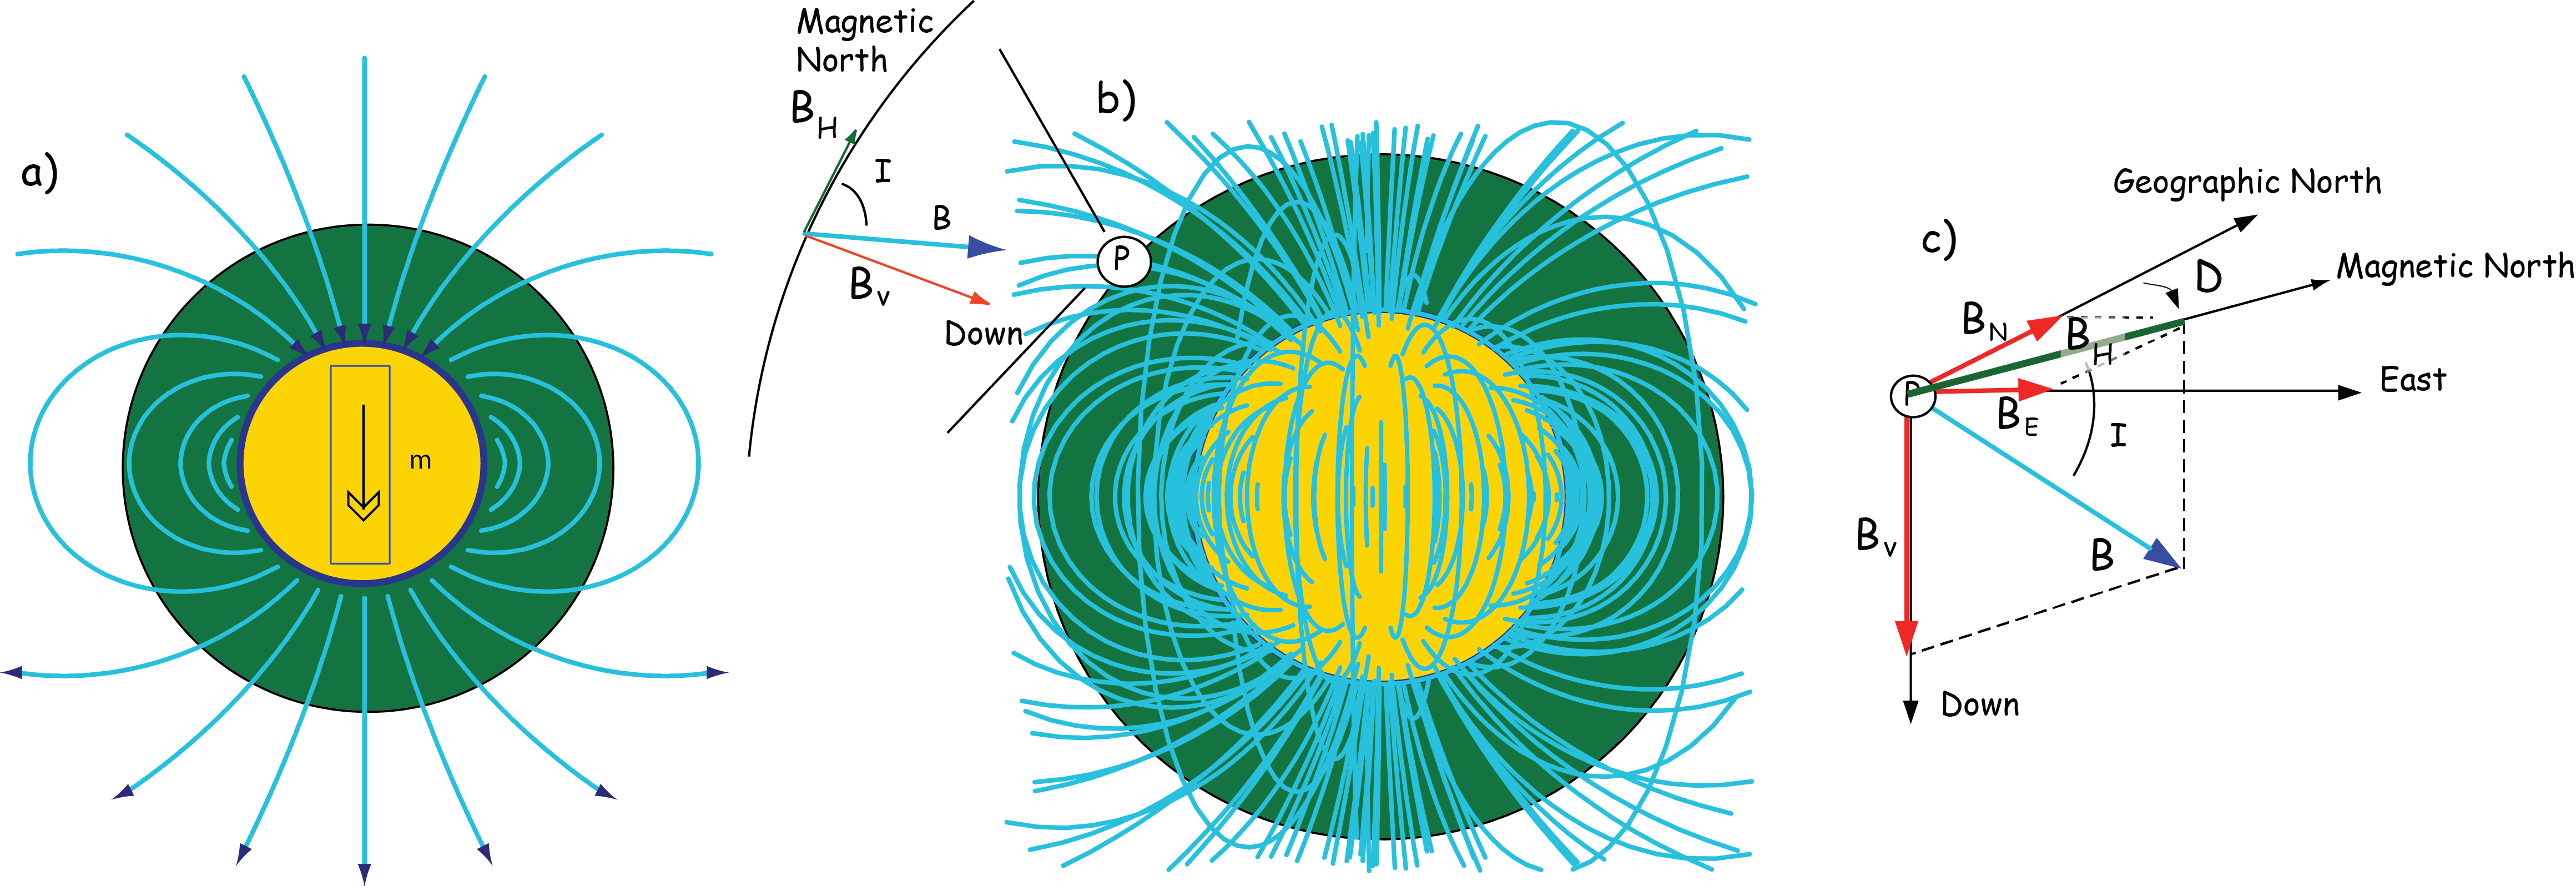

In [3]:
Image(filename='Figures/components.png')

_a) Lines of flux produced by  a geocentric axial dipole.  b) Lines of flux  of the geomagnetic field of 2005.   At point P the horizontal component of the  field  $B_H$, is directed toward the magnetic north.  The vertical component $B_V$  is directed down and the field makes an angle $I$ with the horizontal, known as the
inclination.  c) Components of the geomagnetic field vector ${\bf B}$.  The angle between the horizontal component (directed toward magnetic north and geographic north is the 
declination $D$.)_ \[Modified from Ben-Yosef et al., 2008, doi:10.1016/j.jas.2008.05.016\] 

In [4]:
import mkigrf as mkigrf
help(mkigrf.doigrf)

Help on function doigrf in module mkigrf:

doigrf(long, lat, date)
    Calculates the interpolated (<2015) or extrapolated (>2015) main field and
    secular variation coefficients and passes them to the Malin and Barraclough
    routine (function pmag.magsyn) to calculate the field from the coefficients.
    
    Parameters:
    -----------
    lon  : east longitude in degrees (0 to 360 or -180 to 180)
    lat   : latitude in degrees (-90 to 90)
    date  : Required date in years and decimals of a year (A.D.)
    
    Return
    -----------
    x : north component of the magnetic field in nT
    y : east component of the magnetic field in nT
    z : downward component of the magnetic field in nT
    f : total magnetic field in nT
    
    By default, igrf12 coefficients are used between 1900 and 2020
    from http://www.ngdc.noaa.gov/IAGA/vmod/igrf.html.
    
    
    To check the results you can run the interactive program at the NGDC
    www.ngdc.noaa.gov/geomag-web



**mkigrf.doigrf** returns $x,y,z$ cartesian components of the magnetic field vector.  But we want to plot the polar coordinates _declination, inclination, and strength_.  So we need to convert from cartesian coordinates to polar coordinates.  There is a handy function  **mkigrf.cart2dir()** that will do this for you.   For example, we find the declination for San Diego in 2017 like this:

In [5]:
help(mkigrf.cart2dir)

Help on function cart2dir in module mkigrf:

cart2dir(x, y, z)
    Converts a direction in cartesian coordinates into declination, inclinations
    
    Parameters
    ----------
    cart : input list of [x,y,z] or list of lists [[x1,y1,z1],[x2,y2,z2]...]
    
    Returns
    -------
    direction_array : returns an array of [declination, inclination, intensity]
    
    Examples
    --------
    >>> pmag.cart2dir([0,1,0])
    array([ 90.,   0.,   1.])



In [6]:
San_lat=33
San_lon=243
x,y,z,f=mkigrf.doigrf(San_lon,San_lat,2018)
Dec,Inc,B=mkigrf.cart2dir(x,y,z)
print ('%7.1f'%(Dec)) # notice the formatting

   11.5


We can use the tools in **mkigrf** to evaluate the magnetic field over the surface of the Earth and then contour it on, say, a Mollweide projection.  There is another tool in **mkigrf** called **magMap( )** that comes in handy now.  It will generate the data to make a global map of the geomagnetic field which we can then plot on a projection of our choosing (say, Mollweide) using the tools in **cartopy**.  

In [7]:
help(mkigrf.magMap)

Help on function magMap in module mkigrf:

magMap(date, **kwargs)
    generates the data for a map of the magnetic field. 
    Inputs: 
    required: 
        date = decimal year for evaluation (between 1900 and 2020)
    optional: 
        lon_0 = desired zero longitude
    
    Returns: 
    
    Bdec = declinations
    Binc = inclinations
    B = field strength (in microtesla)
    lons = array of longitudes
    lats = array of latitudes



We can call magMap for any date we like.  We also have to specify the central longitude that we plan to use in the Mollweide projection.  Here I use the Greenwich meridian (0).   

In [8]:
date=2015 # let's do this for 2018
lon_0=0 # we can specify the grid spacing and the intended 0 longitude for the plot
Ds,Is,Bs,lons,lats=mkigrf.magMap(date,lon_0=lon_0)

And.... drum roll ....  we can plot them on a contour map.  

Here is the field strength data ($Bs$).  

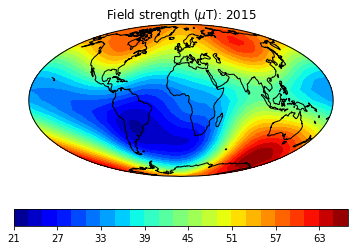

In [9]:
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=lon_0))
X, Y = np.meshgrid(lons,lats)
lincr=2
levmax=round(Bs.max())+lincr
levmin=round(Bs.min()-lincr)
levels=np.arange(levmin,levmax,lincr)
m=ax.contourf(X, Y, Bs, levels,transform=ccrs.PlateCarree(),cmap=cm.jet)
ax.set_global()
ax.coastlines()
cbar=plt.colorbar(m,orientation='horizontal') # put on a color bar of intensities
plt.title('Field strength ($\mu$T): '+str(date));

And the inclinations ($Is$):

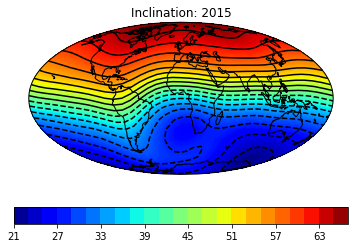

In [10]:
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=lon_0))
X, Y = np.meshgrid(lons,lats)
lincr=1
levmax=Is.max()+lincr
levmin=round(Is.min()-lincr)
levels=np.arange(levmin,levmax,lincr)
ax.contourf(X,Y, Is, levels,transform=ccrs.PlateCarree(),cmap=cm.jet)
ax.contour(X,Y,Is,levels=np.arange(-80,90,10),transform=ccrs.PlateCarree(),colors='black') 
ax.set_global()
ax.coastlines()
cbar=plt.colorbar(m,orientation='horizontal') # put on a color bar of intensities
plt.title('Inclination: '+str(date));

Okay - i love magnetic fields and I think these maps are cool. 